# News Summarization and Topic Modeling App

This notebook demonstrates the process to build a simple news summarization. It uses the transformers library for summarizing news articles, BeautifulSoup for web scraping, and Gensim for topic modeling. This app fetches news articles, summarizes them, and applies topic modeling to analyze common themes.

In [136]:
!pip install requests transformers beautifulsoup4
!pip install joblib tokenizers
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [137]:
# Configuration for News API
NEWS_API_KEY = '48f76777b6c74b43b1422e195d2f7d2d'  # Replace with your actual News API key
NEWS_API_URL = 'https://newsapi.org/v2/top-headlines'

In [138]:
import requests

def fetch_news(category, country='us'):
    params = {
        'category': category,
        'country': country,
        'apiKey': NEWS_API_KEY,
    }
    response = requests.get(NEWS_API_URL, params=params)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return [
            {'title': article['title'],'description':article['description'], 'url': article['url'], 'publishedAt':article['publishedAt']}
            for article in articles[:5]  # Limit based on the parameter
        ]
    else:
        raise Exception('Failed to fetch news')

In [139]:
category = 'technology'  # Change category as needed
articles = fetch_news(category)
for article in articles:
    print(f"Title: {article['title']}")
    print(f"URL: {article['url']}")
    print(f"Description: {article['description']}")
    print(f"publishedAt: {article['publishedAt']}\n")

Title: 35 Cool Gift Ideas For Kids That Santa May Want To Start Perusing *Now* - BuzzFeed
URL: https://www.buzzfeed.com/bekoconnell/cool-gift-ideas-kids-trendy-2024
Description: Check out these trendy toys before they sell out.
publishedAt: 2024-10-28T03:31:02Z

Title: Google quietly fixed the biggest problem with Quick Share for Windows - Android Authority
URL: https://www.androidauthority.com/quick-share-for-windows-wifi-direct-3494451/
Description: Tired of slow file transfer speeds? Quick Share for Windows no longer needs your Windows PC and Android phone to be on the same network.
publishedAt: 2024-10-28T03:06:03Z

Title: Liberty Falls Main Quest Easter Egg Walkthrough - Call of Duty: Black Ops 6 Guide - IGN
URL: https://www.ign.com/wikis/call-of-duty-black-ops-6/Liberty_Falls_Main_Quest_Easter_Egg_Walkthrough
Description: A mysterious outbreak has taken hold of the small West Virginian town of Liberty Falls. It&apos;s up to you to contain the threat and locate the lost scientist


In [140]:
from bs4 import BeautifulSoup
def scrape_article_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")

            # Modify the selector based on the structure of the articles you're scraping
            paragraphs = soup.find_all("p")  # Get all paragraph elements
            full_content = "\n".join(
                [para.get_text() for para in paragraphs]
            )  # Join all paragraph texts
            return full_content.strip()
        else:
            raise Exception(f"Failed to fetch article from {url}")
    except Exception as e:
        print(e)
        return ""

In [141]:
content_dict = {}  # Initialize the dictionary to store content
valid_articles=[]
for article in articles:
    content=scrape_article_content(article['url'])
    if content:  # If content is not None or empty
        content_dict[article['url']] = content  # Store valid content
        valid_articles.append(article) 
    
        print(f"\n\nURL: {article['url']}")
        print(f"Content: {content_dict[article['url']]}")

articles=valid_articles
    
    



URL: https://www.buzzfeed.com/bekoconnell/cool-gift-ideas-kids-trendy-2024
Content: Gift Guide
Beauty + Personal Care
Fashion
Home
Sports + Fitness
Stores
Tech
Kids
Pets
Sex Toys
View All 
We hope you love our recommendations! Some may have been sent as samples, but all were independently selected by our editors. Just FYI, BuzzFeed and its publishing partners may collect a share of sales and/or other compensation from the links on this page.
Check out these trendy toys before they sell out.
BuzzFeed Staff
There's plenty for the 4-inch Batman figure to do in his command center! Fly on his Batglider, shoot villains with the blasters, gear up at the armory, and chat with Alfred on the Batcomputer.
Promising review: "My child still plays with it today six months later, so it's the best investment I ever got for him. I'm satisfied with the construction and stability. It's a fun toy for a 7-year-old. " —William
Get it from Amazon for $59.99.
Promising review: "Talk about holiday spirit in 



URL: https://www.androidauthority.com/quick-share-for-windows-wifi-direct-3494451/
Content: Affiliate links on Android Authority may earn us a commission. Learn more.
Published onOctober 27, 2024

One of the best tools to transfer files between your Android phone and your Windows PC is Quick Share. It’s easy to set up, easy to use, and transfers files really quickly. However, one major issue with the Quick Share for Windows client is that it transfers files really slowly if your Windows PC isn’t on the same Wi-Fi network as your Android phone. At least, that’s how things used to be, because Google quietly fixed this problem some time back.
When Google launched Quick Share for Windows back in 2023, it stressed that both your Android phone and your Windows PC need to be connected to the same network in order to get the best file transfer speeds. If not, then Quick Share would transfer files over a Bluetooth connection, which is dramatically slower than a Wi-Fi connection. For example, 



URL: https://www.gematsu.com/2024/10/animal-crossing-pocket-camp-complete-launches-december-3
Content: Animal Crossing: Pocket Camp Complete will launch for iOS via App Store and Android via Google Play on December 3, Nintendo announced. It will be available at an introductory price of $9.99 until January 31, 2025, after which the price will change to $19.99. 
As previously announced, the free-to-play service-based game Animal Crossing: Pocket Camp will end shut down on November 29. Animal Crossing: Pocket Camp Complete will be an offline, paid version of the game without any additional in-game purchases, featuring items and events that were released over the course of the game’s seven-year run.
Here is an overview of the Complete version, via its store pages:
About
The Animal Crossing: Pocket Camp game was released in 2017. This one-time purchase app is packed with items and events that were released over the course of seven years. It keeps the general game play of Animal Crossing: 

In [142]:
for article in articles:
    print(f"Title: {article['title']}")
    print(f"URL: {article['url']}")
    print(f"Description: {article['description']}")
    print(f"publishedAt: {article['publishedAt']}\n")
    print(f"Content: {content_dict[article['url']]}")
    print('-'*70)

Title: 35 Cool Gift Ideas For Kids That Santa May Want To Start Perusing *Now* - BuzzFeed
URL: https://www.buzzfeed.com/bekoconnell/cool-gift-ideas-kids-trendy-2024
Description: Check out these trendy toys before they sell out.
publishedAt: 2024-10-28T03:31:02Z

Content: Gift Guide
Beauty + Personal Care
Fashion
Home
Sports + Fitness
Stores
Tech
Kids
Pets
Sex Toys
View All 
We hope you love our recommendations! Some may have been sent as samples, but all were independently selected by our editors. Just FYI, BuzzFeed and its publishing partners may collect a share of sales and/or other compensation from the links on this page.
Check out these trendy toys before they sell out.
BuzzFeed Staff
There's plenty for the 4-inch Batman figure to do in his command center! Fly on his Batglider, shoot villains with the blasters, gear up at the armory, and chat with Alfred on the Batcomputer.
Promising review: "My child still plays with it today six months later, so it's the best investment I ever g

In [143]:
# from transformers import pipeline

# # Initialize the summarization pipeline
# summarizer_pipeline = pipeline('summarization', model='facebook/bart-base')
# # Load the sentiment analysis pipeline
# sentiment_pipeline = pipeline('sentiment-analysis')#by default, uses the "distilbert-base-uncased-finetuned-sst-2-english"

# def summarize_text(text):
#     if text:
#         summary = summarizer_pipeline(text, max_length=200, min_length=150, do_sample=False)
#         summary_text = summary[0]['summary_text']

#         # Perform sentiment analysis on the summary
#         sentiment = sentiment_pipeline(summary_text)[0]

#         return {
#             'original_text': text,
#             'summary': summary_text,
#             'sentiment': sentiment['label'],  # Positive, Negative, or Neutral
#             'sentiment_score': sentiment['score']  # Confidence score
#         }
#     return {'original_text': 'No content to summarize', 'summary': '', 'sentiment': '', 'sentiment_score': 0}


In [144]:
from transformers import pipeline

# Initialize the summarization pipeline
summarizer_pipeline = pipeline('summarization', model='facebook/bart-base')

def summarize_text(text):
    if text:
        summary = summarizer_pipeline(
            text, max_length=200, min_length=150, do_sample=False
        )
        return {
            'original_text': text,
            'summary': summary[0]['summary_text']
        }
    return {'original_text': 'No content to summarize', 'summary': ''}

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [145]:
# Example of fetching and summarizing news articles


try:
#     articles = fetch_news(category)
    summaries = []
    
    for article in articles:
        # Define the maximum length of characters (e.g., 2000 characters)
        MAX_CONTENT_LENGTH = 2000

        # Truncate the content and store it in `full_content`
        full_content = f"{content_dict[article['url']][:MAX_CONTENT_LENGTH]}"

        summary_data = summarize_text(full_content)
        summaries.append({
            'title': article['title'],
            'original_text': summary_data['original_text'],
            'summary': summary_data['summary'],
#             'sentiment': summary_data['sentiment'],  # Positive, Negative, or Neutral
#             'sentiment_score': summary_data['sentiment_score'] 
        })
except Exception as e:
    print(f'Error fetching or summarizing articles: {e}')




In [146]:
# Display the summaries
for summary in summaries:
    print(f"\n\nTitle: {summary['title']}\nOriginal Text: {summary['original_text']}\nSummary: {summary['summary']}\n")
    print('-'*70)



Title: 35 Cool Gift Ideas For Kids That Santa May Want To Start Perusing *Now* - BuzzFeed
Original Text: Gift Guide
Beauty + Personal Care
Fashion
Home
Sports + Fitness
Stores
Tech
Kids
Pets
Sex Toys
View All 
We hope you love our recommendations! Some may have been sent as samples, but all were independently selected by our editors. Just FYI, BuzzFeed and its publishing partners may collect a share of sales and/or other compensation from the links on this page.
Check out these trendy toys before they sell out.
BuzzFeed Staff
There's plenty for the 4-inch Batman figure to do in his command center! Fly on his Batglider, shoot villains with the blasters, gear up at the armory, and chat with Alfred on the Batcomputer.
Promising review: "My child still plays with it today six months later, so it's the best investment I ever got for him. I'm satisfied with the construction and stability. It's a fun toy for a 7-year-old. " —William
Get it from Amazon for $59.99.
Promising review: "Talk abo

In [147]:
summary_data

{'original_text': 'Animal Crossing: Pocket Camp Complete will launch for iOS via App Store and Android via Google Play on December 3, Nintendo announced. It will be available at an introductory price of $9.99 until January 31, 2025, after which the price will change to $19.99. \nAs previously announced, the free-to-play service-based game Animal Crossing: Pocket Camp will end shut down on November 29. Animal Crossing: Pocket Camp Complete will be an offline, paid version of the game without any additional in-game purchases, featuring items and events that were released over the course of the game’s seven-year run.\nHere is an overview of the Complete version, via its store pages:\nAbout\nThe Animal Crossing: Pocket Camp game was released in 2017. This one-time purchase app is packed with items and events that were released over the course of seven years. It keeps the general game play of Animal Crossing: Pocket Camp without additional in-game purchases.\nYou’ve become a campsite manage

In [148]:
# sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english',device=0)


# for summary in summaries:
#     sentiment = sentiment_pipeline(summary['title'])[0]
#     print(f"\n\nTitle: {summary['title']}\nNews Sentiment: {sentiment}\nSummary: {summary['summary']}\n")
#     print('-'*70)

In [149]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocess the text for LDA
def preprocess_text(text):
    tokens = [word for word in text.lower().split() if word.isalnum() and word not in stop_words]
    return tokens

# Sample article list (replace with your actual content)
documents = [preprocess_text(summary['original_text']) for summary in summaries]

# Create dictionary and corpus for LDA
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display the topics
topics = lda_model.print_topics()
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.003*"may" + 0.003*"promising" + 0.003*"camp" + 0.003*"amazon" + 0.003*"animal" + 0.003*"get" + 0.003*"love" + 0.003*"pocket" + 0.003*"toys" + 0.003*"data"
Topic 2: 0.003*"windows" + 0.003*"pc" + 0.003*"transfer" + 0.003*"android" + 0.003*"get" + 0.003*"promising" + 0.003*"quick" + 0.003*"may" + 0.003*"share" + 0.003*"best"
Topic 3: 0.052*"windows" + 0.039*"transfer" + 0.031*"pc" + 0.027*"android" + 0.027*"quick" + 0.022*"share" + 0.022*"files" + 0.018*"network" + 0.018*"file" + 0.014*"need"
Topic 4: 0.038*"camp" + 0.033*"pocket" + 0.033*"animal" + 0.024*"may" + 0.019*"complete" + 0.019*"game" + 0.019*"data" + 0.015*"via" + 0.015*"released" + 0.015*"favorite"
Topic 5: 0.020*"promising" + 0.020*"amazon" + 0.017*"get" + 0.012*"may" + 0.012*"buzzfeed" + 0.012*"love" + 0.009*"gift" + 0.009*"kids" + 0.009*"two" + 0.009*"loves"


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lockyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


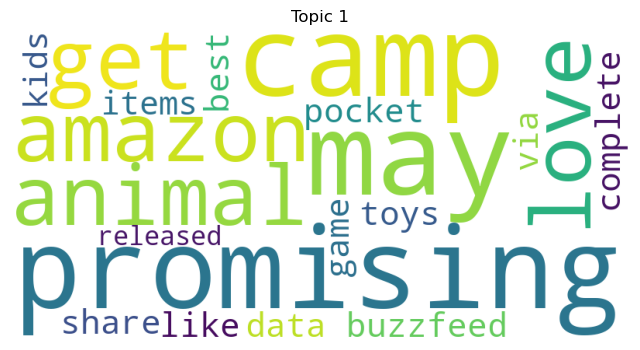

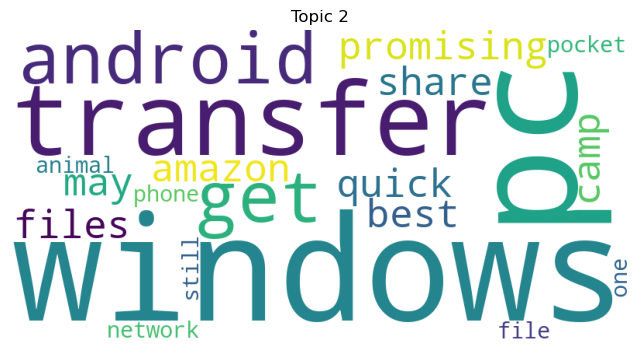

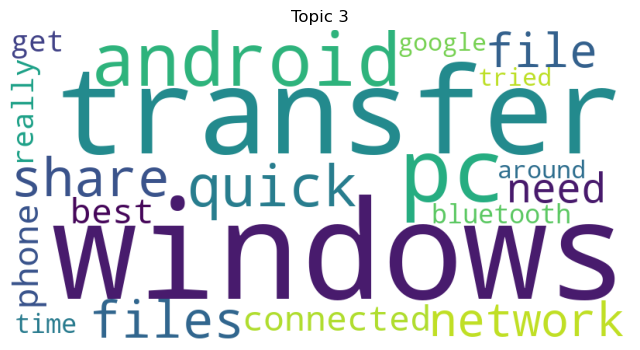

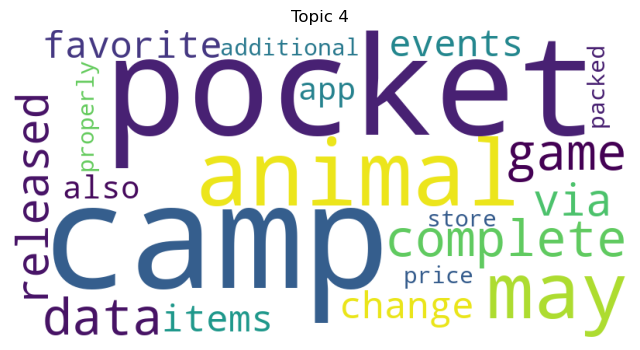

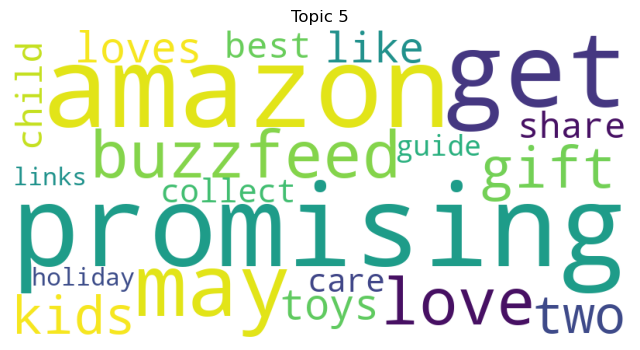

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Generate word clouds for each topic
for idx in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))
    
    # Get the topic words and their weights
    topic = lda_model.show_topic(idx, topn=20)
    
    # Create a string for WordCloud
    word_freq = {word: weight for word, weight in topic}
    
    # Generate the WordCloud
    plt.imshow(WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq))
    plt.axis('off')
    plt.title(f'Topic {idx + 1}')
    plt.show()


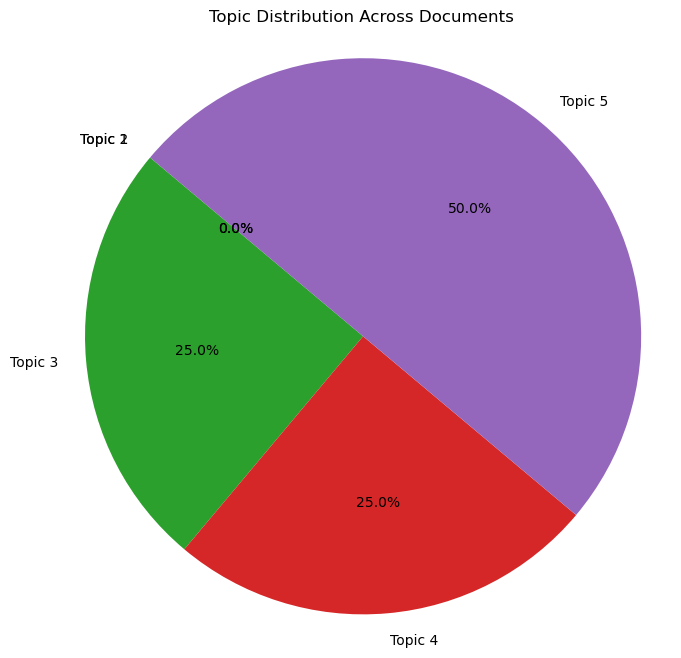

In [152]:
# Get the topic distribution for each document
topic_distribution = [lda_model.get_document_topics(bow) for bow in corpus]

# Summarize the distribution of topics
topic_count = [0] * lda_model.num_topics
for doc in topic_distribution:
    for topic_id, _ in doc:
        topic_count[topic_id] += 1

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(topic_count, labels=[f'Topic {i+1}' for i in range(num_topics)], autopct='%1.1f%%', startangle=140)
plt.title('Topic Distribution Across Documents')
plt.axis('equal')
plt.show()


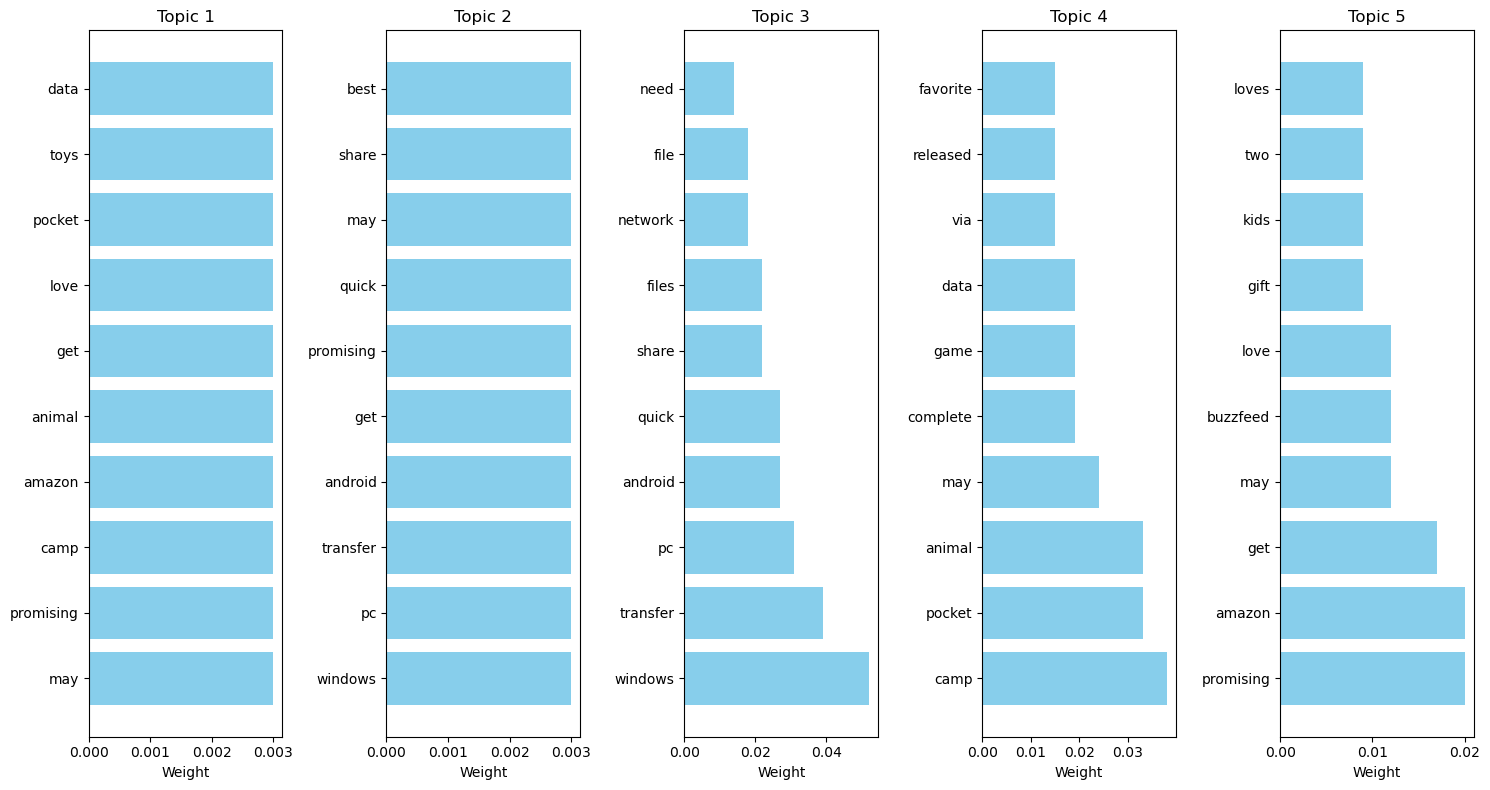

In [153]:
# Number of top words to display for each topic
top_n = 10

plt.figure(figsize=(15, 8))

for i in range(num_topics):
    plt.subplot(1, num_topics, i + 1)
    top_words = topics[i][1].split("+")
    words = [word.split("*")[1].strip().replace('"', '') for word in top_words[:top_n]]
    weights = [float(word.split("*")[0]) for word in top_words[:top_n]]
    
    plt.barh(words, weights, color='skyblue')
    plt.title(f'Topic {i + 1}')
    plt.xlabel('Weight')

plt.tight_layout()
plt.show()
